<a href="https://colab.research.google.com/github/Gr1Lo/direct/blob/main/example_direct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Package loading

In [ ]:
!rm -r direct
!git clone https://github.com/Gr1Lo/direct.git

%cd direct/
from direct import *
%cd ..

Reading the data

In [4]:
vals_name='MXD'
clim_var = 'avg summer temperature'

mres = direct_read('drive/MyDrive/direct/rwl/esp_all_mxd.rwl', 
              'drive/MyDrive/direct/rwl/Temp.txt', 
              pth_path='drive/MyDrive/direct/rwl/esp_all_mxd.pth', 
              vals_name=vals_name)

Train/test splitting

In [7]:
mres = mres[~mres[clim_var].isna()]
r = 0.5
ys =np.sort(np.unique(mres.years))
sv = int(r * len(ys))
mask = ys>=ys[sv]

train, test, train_dict = train_test_split(mres, 'MXD', 'avg summer temperature', years_mask=mask)

Comparison of mean values in train and test samples

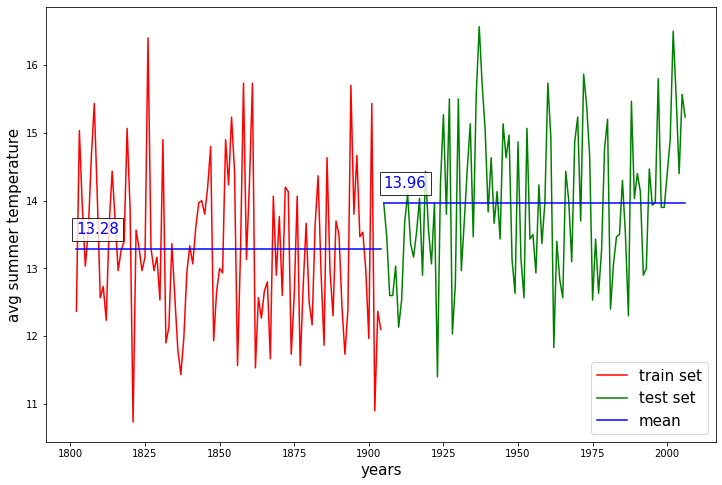

In [8]:
plot_clim_train_test(train, test)

Train and prediction

computing the uncertainty of data replication


100%|██████████| 102/102 [00:49<00:00,  2.07it/s]


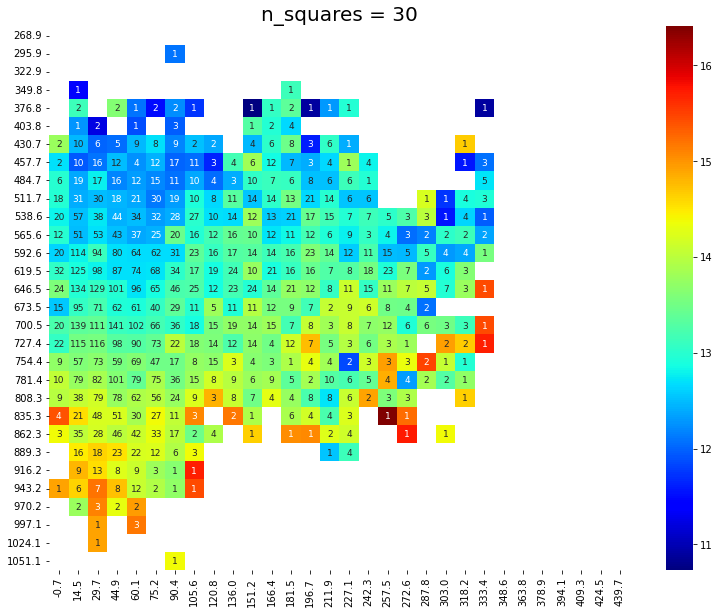

In [12]:
sm = 5 #smoothing parameter
n_sq = 30 #number of squares in axes for averaging
n = 300 #number of values in axes
uncertainty_data_rep = {
  "part_s": 0.5,
  "n_iter": 1000,
  "alpha":0.05
}
uncertainty_instrumental = {
  "part_s": 0.5,
  "n_iter": 100,
  "alpha":0.05
}


pred_df, Z_sq_method = direct(train, train_dict, test, sm, n_sq, n,
                              vals_name=vals_name, 
                              clim_var = clim_var,
                              uncertainty_data_rep = uncertainty_data_rep,
                              uncertainty_instrumental=None, use_std=True)



2d and 3d plots

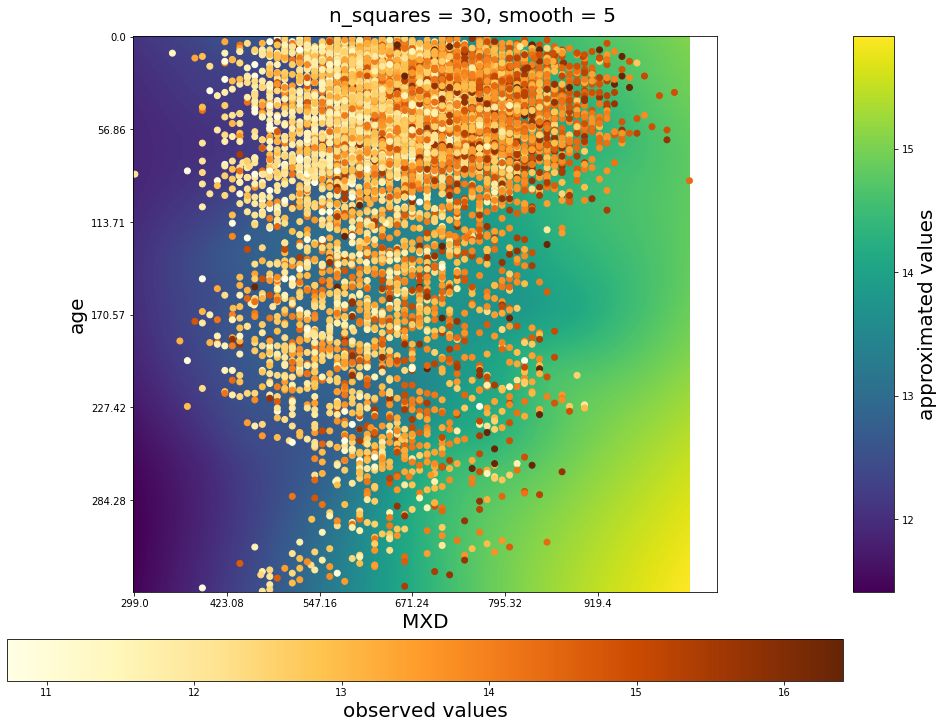

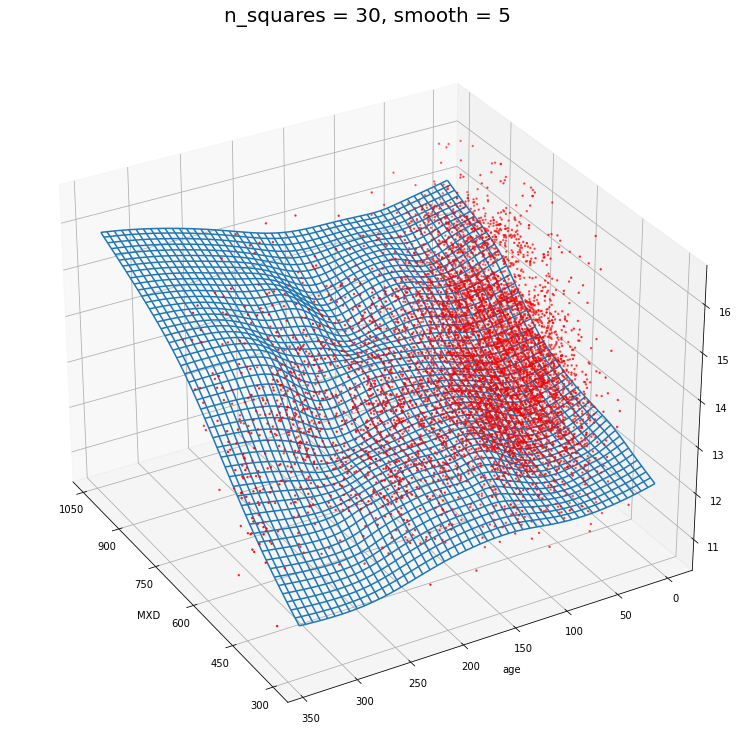

In [10]:
nn = 'n_squares = ' + str(n_sq) + ', smooth = ' + str(sm)
plot2d(train, Z_sq_method, name_ = nn, vals_name=vals_name)
plot3d(train, Z_sq_method, name_ = nn, vals_name=vals_name)

Predictions for each year

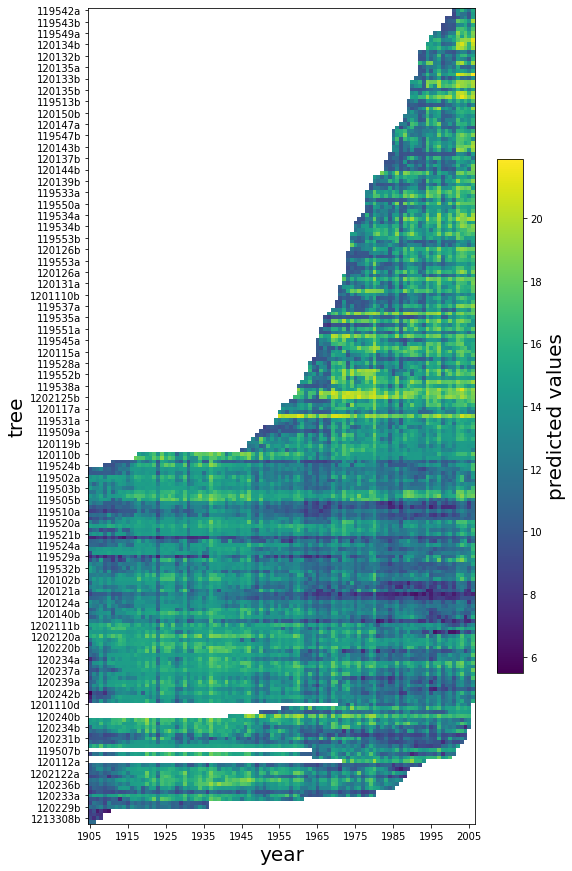

In [11]:
plot_preds(pred_df, y_lables_step=3)

lines graph with data replication uncertainty envelopes

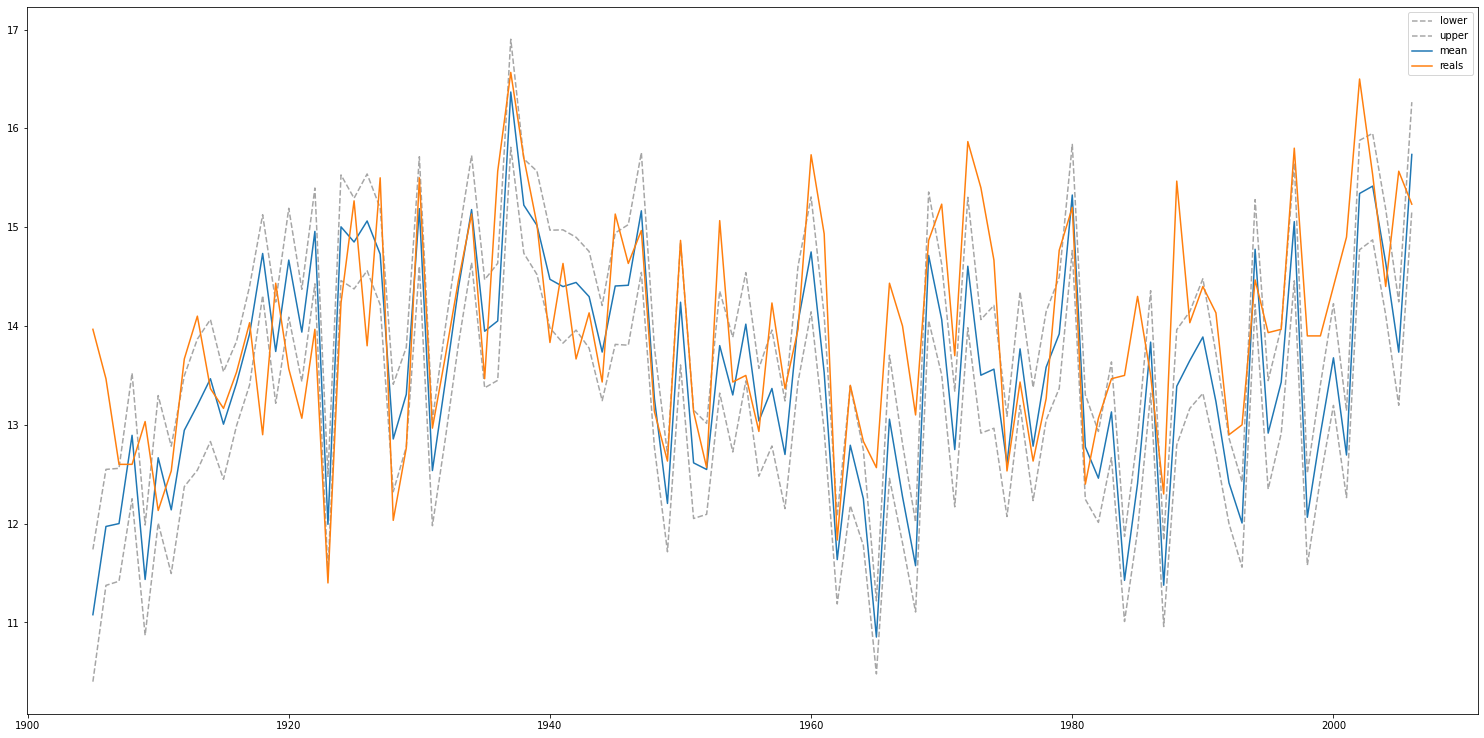

In [13]:
av_df = pred_df.groupby(['years']).mean()
plt.figure(figsize=(26, 13))
plt.plot(av_df.index.values, av_df['lower_1'].values, '--', label = "lower", c='0.65')
plt.plot(av_df.index.values, av_df['upper_1'].values, '--', label = "upper", c='0.65')
plt.plot(av_df.index.values, av_df['preds'].values, label = "mean")
plt.plot(av_df.index.values, av_df['avg summer temperature'].values, label = "reals")
plt.legend()
plt.show()

Validation metrics values for different parameters

100%|██████████| 30/30 [20:28<00:00, 40.94s/it]


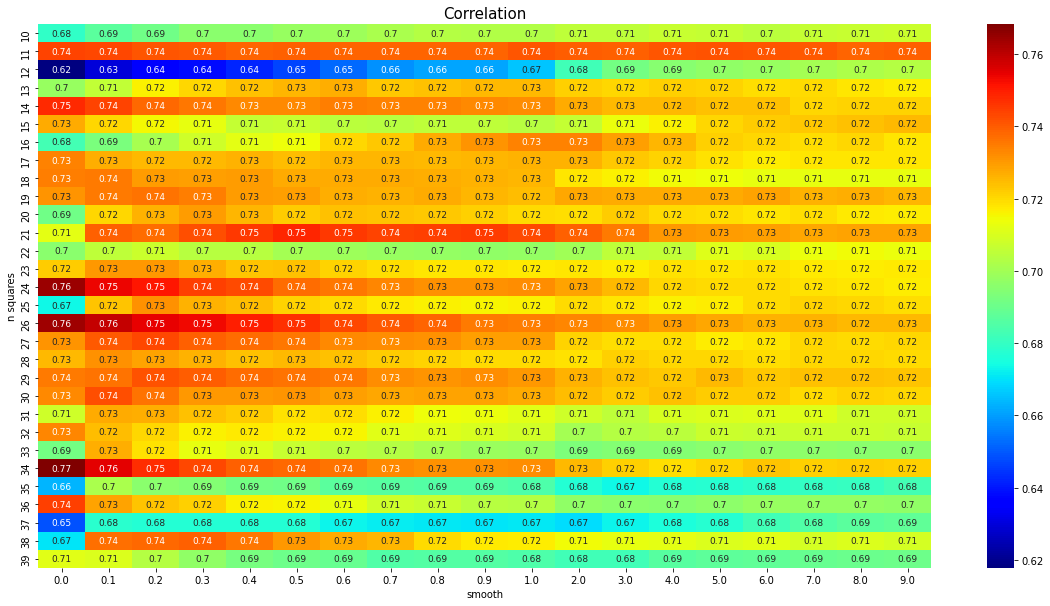

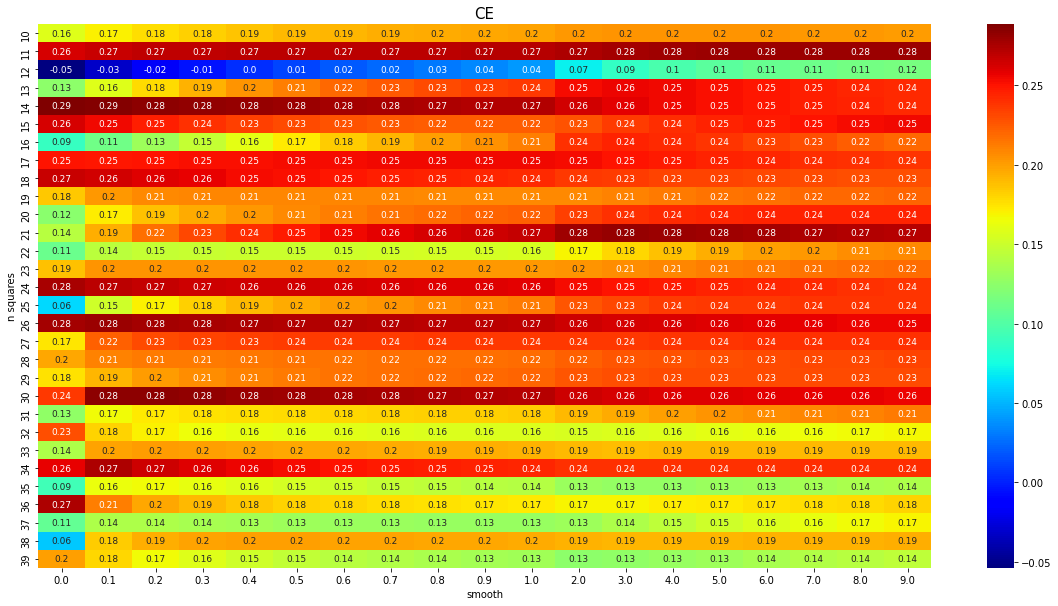

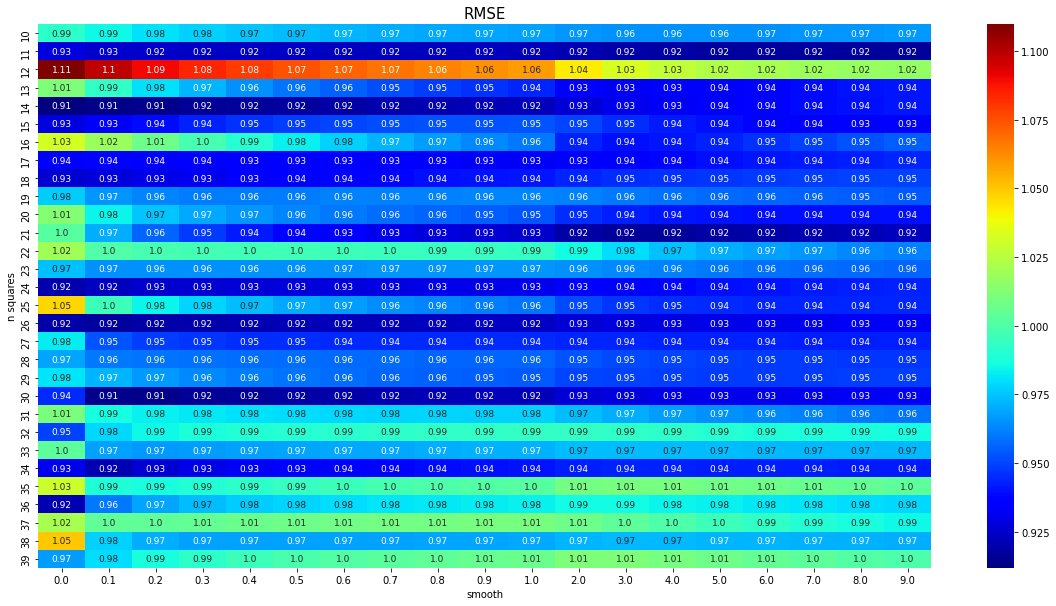

In [ ]:
smooth_list = np.concatenate((np.arange(0, 1, 0.1),np.arange(1, 10, 1))).tolist()
n_sq_list = np.arange(10, 40, 1).tolist()

metrics = parameter_graph(train, test, n, clim_var, vals_name, n_sq=n_sq_list, sm = smooth_list)